In [1]:
!pip install tqdm
# !pip install scikit-learn
# !pip install "tensorflow==2.10"
# !pip install "numpy<2" --force-reinstall
# !pip install matplotlib
# !pip install torch
# !pip install opencv-python
# !pip install keras
# !pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())


C:\Users\chanu\anaconda3\envs\tensorNewGPU\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


True


In [3]:
print(tf.sysconfig.get_build_info())


OrderedDict([('cpu_compiler', 'C:/Program Files (x86)/Microsoft Visual Studio/2019/Community/VC/Tools/MSVC/14.29.30133/bin/HostX64/x64/cl.exe'), ('cuda_compute_capabilities', ['sm_35', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'compute_80']), ('cuda_version', '64_112'), ('cudart_dll_name', 'cudart64_112.dll'), ('cudnn_dll_name', 'cudnn64_8.dll'), ('cudnn_version', '64_8'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False), ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll'), ('nvcuda_dll_name', 'nvcuda.dll')])


In [4]:
import numpy as np
import tensorflow as tf
import sys
import keras
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.layers import Dropout,Conv2D, MaxPooling2D,BatchNormalization,Conv2DTranspose,Concatenate,Input,Activation,Flatten,Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from  tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# import torch
# from scipy.io import loadmat
# import h5py
import tensorflow as tf
from tensorflow.keras.utils import register_keras_serializable
import cv2
from tensorflow.keras.metrics import Precision, Recall

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [5]:
# tf.sysconfig.get_build_info()
import tensorflow as tf

# List logical devices (after setting visible devices)
logical_gpus = tf.config.list_logical_devices('GPU')
print("Logical GPUs:", logical_gpus)



Logical GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [6]:
import tensorflow as tf

print("GPU in use:", tf.test.gpu_device_name())


GPU in use: /device:GPU:0


In [7]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    details = tf.config.experimental.get_device_details(gpus[0])
    print(details)


{'device_name': 'NVIDIA GeForce RTX 4050 Laptop GPU', 'compute_capability': (8, 9)}


In [8]:
gpus=tf.config.list_physical_devices('GPU')
if gpus:
    print('GPU available')
else:
    print('GPU not available')
tf.config.list_physical_devices('GPU')

GPU available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:

# Set seeds for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)


In [10]:
# import tensorflow as tf
#
# print("TF version:", tf.__version__)
# print("GPUs:", tf.config.list_physical_devices('GPU'))
#
# tf.debugging.set_log_device_placement(True)
#
# x = tf.random.normal([2048, 2048])
# y = tf.matmul(x, x)
# print("Done")

In [11]:
tf.debugging.set_log_device_placement(False)

In [12]:
dataset = "C:\IIT campus\Second Year\DSGP\Segementation_1\Segementation_1"

In [13]:
image_files = sorted(os.listdir('C:\Projects Datasets\Segmentation_1\Segmentation\\images'))
mask_files = sorted(os.listdir('C:\Projects Datasets\Segmentation_1\Segmentation\\masks'))

In [14]:
print(image_files[:10])
print(mask_files[:10])

['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']
['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']


In [15]:
def display_image_mask(image_path,mask_path):
    count=0
    for image_file,mask_file in zip(image_files,mask_files):
        if count>=6:
            break
        image_path_full=os.path.join(image_path,image_file)
        mask_path_full=os.path.join(mask_path,mask_file)

        image=cv2.imread(image_path_full)
        mask=cv2.imread(mask_path_full,cv2.IMREAD_GRAYSCALE)

        if image is None:
                raise ValueError(f"Image at path {imagepath_full} could not be loaded")
        if mask is None:
                raise ValueError(f"Mask at path {maskpath_full} could not be loaded")

        mask_3ch=cv2.merge([mask,mask,mask])
        image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,10))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Image')

        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title('Mask')

        plt.subplot(1,3,3)
        overlay = cv2.addWeighted(image_rgb, 0.7, mask_3ch, 0.3, 0)
        plt.imshow(overlay)
        plt.title("Image with overlay")

        plt.show()
        count+=1

In [16]:
image_path='C:\Projects Datasets\Segmentation_1\Segmentation\\images'
mask_path='C:\Projects Datasets\Segmentation_1\Segmentation\\masks'

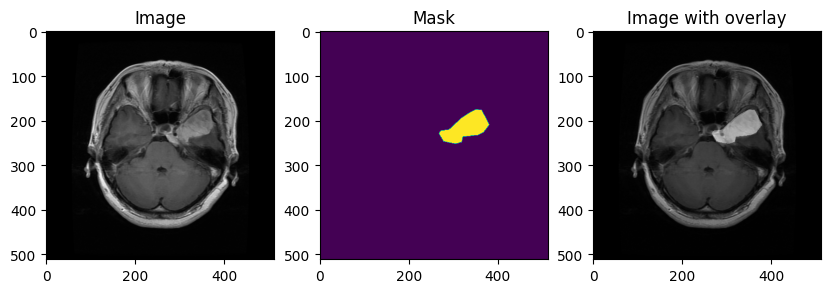

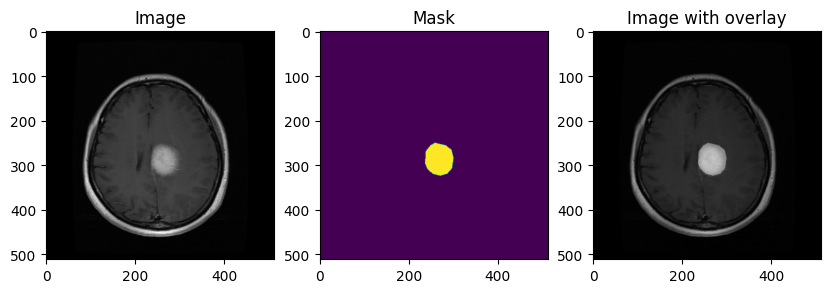

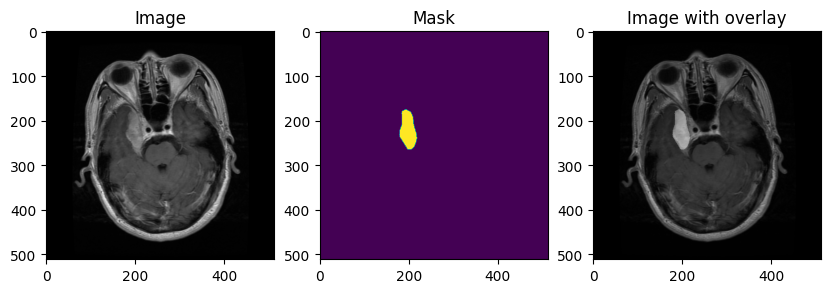

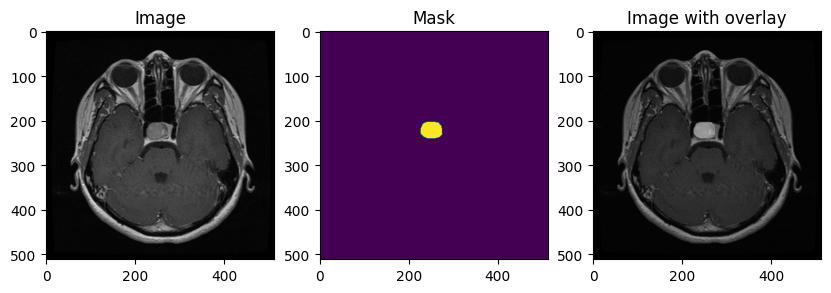

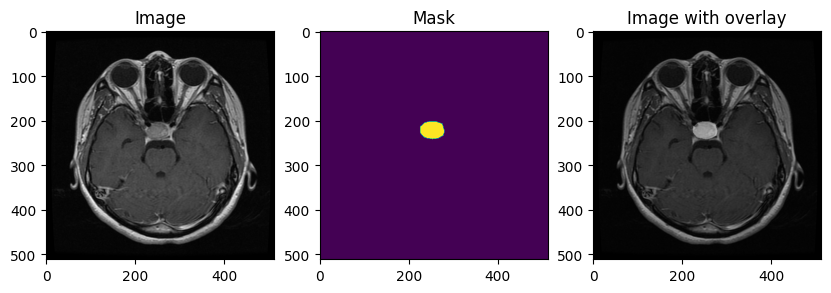

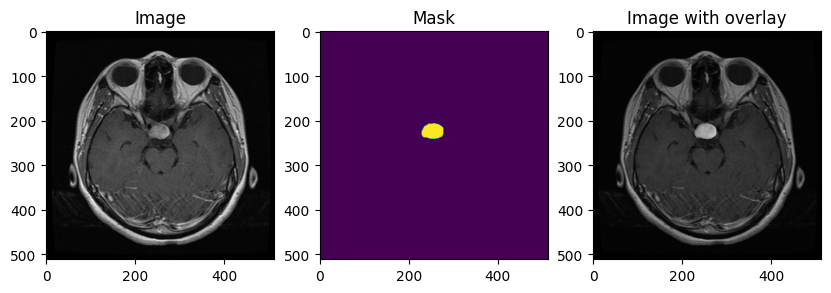

In [17]:
display_image_mask(image_path,mask_path)

In [18]:
images_size=[]
masks_size=[]
#Check images shape
for image_file, mask_file in tqdm(zip(image_files, mask_files)):

    imagepath_full = os.path.join(image_path, image_file)
    maskpath_full = os.path.join(mask_path, mask_file)

    image = cv2.imread(imagepath_full)
    mask = cv2.imread(maskpath_full)

    images_size.append(image.shape)
    masks_size.append(mask.shape)

3052it [00:18, 164.92it/s]


In [19]:
print(list(set(images_size)))
print(list(set(masks_size)))

[(512, 512, 3), (256, 256, 3)]
[(512, 512, 3), (256, 256, 3)]


In [20]:
SIZE=224
CHANNEL=1


In [21]:
def preprocessing_images_masks(num_samples=None):
    images=[]
    masks=[]

    if num_samples is not None:
        selected_image_files = image_files[:num_samples]
        selected_mask_files = mask_files[:num_samples]
    else:
        selected_image_files = image_files
        selected_mask_files = mask_files

    for image_file, mask_file in tqdm(zip(selected_image_files, selected_mask_files)):
        imagepathfull=os.path.join(image_path,image_file)
        maskpathfull=os.path.join(mask_path,mask_file)

        image = cv2.imread(imagepathfull,cv2.IMREAD_GRAYSCALE)  #load img
        image = cv2.resize(image,(SIZE,SIZE))
        image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        image = image/255.0  #normalizes pixel values 0-1
        images.append(image)

        mask = cv2.imread(maskpathfull,cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask,(SIZE,SIZE))
        mask = mask/255.0
        masks.append(mask)
    #add a channel to mask (depth of information per pixel(1))
    return np.array(images), np.expand_dims(np.array(masks), axis=-1)

In [22]:
X,y=preprocessing_images_masks(num_samples=1400)

1400it [00:08, 163.37it/s]


In [23]:
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (1400, 224, 224, 3)
Shape of y: (1400, 224, 224, 1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [25]:
print('The shape of X_train',X_train.shape)
print('The shape of y_train',y_train.shape)
print('The shape of X_test',X_test.shape)
print('The shape of y_test',y_test.shape)

The shape of X_train (1120, 224, 224, 3)
The shape of y_train (1120, 224, 224, 1)
The shape of X_test (280, 224, 224, 3)
The shape of y_test (280, 224, 224, 1)


In [26]:
#avoid division by zero
smooth = 1e-15

#decor- save custom function with model
# @keras.saving.register_keras_serializable()

@tf.keras.utils.register_keras_serializable(package="metrics")

#metric for overlap between prediction and ground truth
def dice_coef(y_true, y_pred):
    #convert multi dimensions to 1D
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)

    #common positive pixels
    intersection = tf.reduce_sum(y_true * y_pred)

    #balances TN and FP
    return (2. * intersection + smooth) / (
        tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth
    )

# @register_keras_serializable()

@tf.keras.utils.register_keras_serializable(package="metrics")
#define loss function base one coef
def dice_loss(y_true, y_pred):
    #Reduce tumor mismatch
    return 1.0 - dice_coef(y_true, y_pred)

In [27]:
# tf.debugging.set_log_device_placement(True)

In [28]:
#data augmentation
# train_datagen=(ImageDataGenerator
#                (brightness_range=(0.9,1.1),#Randomly adjust brightness
#                zoom_range=[.9,1.1],#Random zoom applied
#                fill_mode='nearest') #Prevents unnatural
#                )
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

val_datagen=ImageDataGenerator()

In [29]:
#extracts features and learn pattern from the input image
# def conv_block(input, num_filters):
#     x = Conv2D(num_filters, 3, padding="same")(input) #learn patterns
#     x = BatchNormalization()(x)  #stabilizes training
#     x = Activation("relu")(x)    #network to learn complex features.(Introduces non-linearity)

#     #combine learn pattern into meaningful region
#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)

#     return x

def conv_block(x, num_filters, dropout_rate=0.0):
    x = Conv2D(num_filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    if dropout_rate > 0:
        x = Dropout(dropout_rate)(x)

    x = Conv2D(num_filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x


In [30]:
#increase resolution and merge encoder info in tumor mask
# def decoder_block(input, skip_features, num_filters):
#     #Upsampling (double spatial resolution)
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

def decoder_block(input, skip_features, num_filters, dropout_rate=0.0):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters, dropout_rate)
    return x



In [31]:
def build_light_resnet50_unet(input_shape):
    inputs = Input(shape=input_shape)
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

    # Encoder (skip connections)
    s1 = inputs                                      # 224 x 224 x 3
    s2 = resnet50.get_layer("conv1_relu").output     # 112 x 112 x 64
    s3 = resnet50.get_layer("conv2_block3_out").output  # 56 x 56 x 256

    # Bridge(compressed view)
    b1 = resnet50.get_layer("conv3_block4_out").output  # 28 x 28 x 512

    # Decoder
    d1 = decoder_block(b1, s3, 128, dropout_rate=0.3)  # 56x56
    d2 = decoder_block(d1, s2, 64,  dropout_rate=0.4)  # 112x112
    d3 = decoder_block(d2, s1, 32,  dropout_rate=0.5)  # 224x224


    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="LightResNet50_U-Net")
    return model


input_shape = (224, 224, 3)
model = build_light_resnet50_unet(input_shape)
model.summary()

Model: "LightResNet50_U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                

In [32]:
save_dir = r"C:\Projects Datasets\model_details\resnet_3"
os.makedirs(save_dir, exist_ok=True)
checkpoint_path = os.path.join(save_dir, "best_model_checkpoint.keras")
model_checkpoint  = ModelCheckpoint(checkpoint_path, save_best_only=True,
                                    monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=4,
    min_lr=1e-6,
    verbose=2
)


callback_list = [early_stopping, reduceLR, model_checkpoint]

In [33]:
batch_size = 16

train_generator = train_datagen.flow( X_train, y_train, batch_size=batch_size, shuffle=True)

val_generator = val_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

In [34]:
# print(tf.__version__)
# print(tf.test.is_built_with_cuda())
#
# # tf.debugging.set_log_device_placement(True)
#
# with tf.device('/GPU:1'):
#     model = build_light_resnet50_unet((224,224,3))
#     model.compile(
#         optimizer='adam',
#         loss=dice_loss,
#         metrics=[dice_coef]
#     )
#
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=50,
#     callbacks=callback_list
# )

In [35]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=dice_loss,
              metrics=[dice_coef, 'accuracy', Precision(name="precision"), Recall(name="recall")] )

In [36]:
# history = model.fit(
#     X_train, y_train,
#     batch_size=16,  # Reduced from 32 to 4
#     epochs=100,
#     validation_data=(X_test, y_test),
#     verbose=2,
#     callbacks=callback_list
# )

# with tf.device('/GPU:1'):   # or '/GPU:1'
history = model.fit(
        X_train, y_train,
        batch_size=10,
        epochs=100,
        validation_data=(X_test, y_test),
        verbose=1,
        callbacks=callback_list,

    )

Epoch 1/100
112/112 [==============================] - ETA: 0s - loss: 0.9093 - dice_coef: 0.0907 - accuracy: 0.8470 - precision: 0.0772 - recall: 0.8965
Epoch 1: val_loss improved from inf to 0.97018, saving model to C:\Projects Datasets\model_details\resnet_3\best_model_checkpoint.keras
112/112 [==============================] - 68s 217ms/step - loss: 0.9093 - dice_coef: 0.0907 - accuracy: 0.8470 - precision: 0.0772 - recall: 0.8965 - val_loss: 0.9702 - val_dice_coef: 0.0298 - val_accuracy: 0.3322 - val_precision: 0.0188 - val_recall: 0.9985 - lr: 3.0000e-04
Epoch 2/100
112/112 [==============================] - ETA: 0s - loss: 0.7762 - dice_coef: 0.2238 - accuracy: 0.9779 - precision: 0.3845 - recall: 0.8628
Epoch 2: val_loss did not improve from 0.97018
112/112 [==============================] - 23s 204ms/step - loss: 0.7762 - dice_coef: 0.2238 - accuracy: 0.9779 - precision: 0.3845 - recall: 0.8628 - val_loss: 0.9778 - val_dice_coef: 0.0222 - val_accuracy: 0.9872 - val_precision: 

In [37]:
checkpoint_path_2 = os.path.join(save_dir, "resnet50_trained_model_batch_size_4.keras")

model.save(checkpoint_path_2)


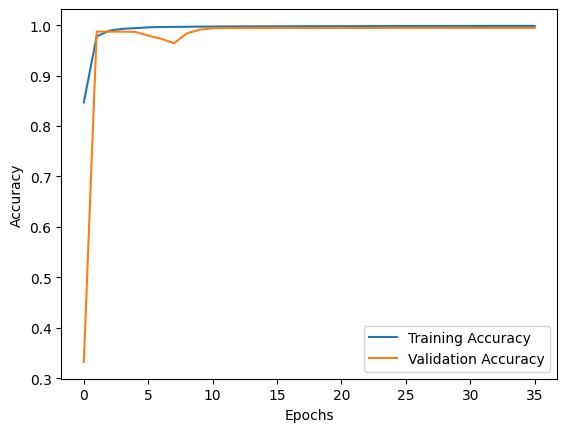

In [38]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

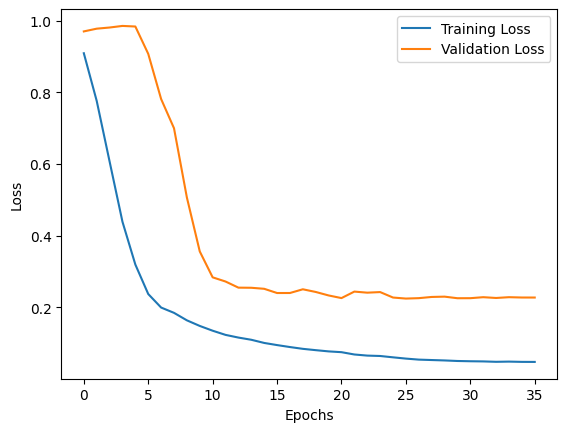

In [39]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
# loss,dice_coef,accuracy=model.evaluate(X_test,y_test)
# print(f'Loss is {loss}')
# print(f'Accuracy is {accuracy}')
# print(f'Dice_Coef is {dice_coef}')

In [41]:
""" Evaluate on test set """
results = model.evaluate(X_test,y_test)
print("\nEvaluation Metrics:")
for metric_name, metric_value in zip(model.metrics_names, results):
    print(f"{metric_name}: {metric_value:.4f}")

9/9 [==============================] - 5s 319ms/step - loss: 0.2269 - dice_coef: 0.7751 - accuracy: 0.9945 - precision: 0.8651 - recall: 0.7125

Evaluation Metrics:
loss: 0.2269
dice_coef: 0.7751
accuracy: 0.9945
precision: 0.8651
recall: 0.7125


In [42]:
model.save("unet_resnet50_backbone.keras")


In [43]:
# from tensorflow.keras.models import load_model
#
# model = load_model(
#     "best_model_checkpoint_1",   # ← folder, NOT file
#     compile=False
# )

In [44]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.uint8)

9/9 [==============================] - 2s 184ms/step


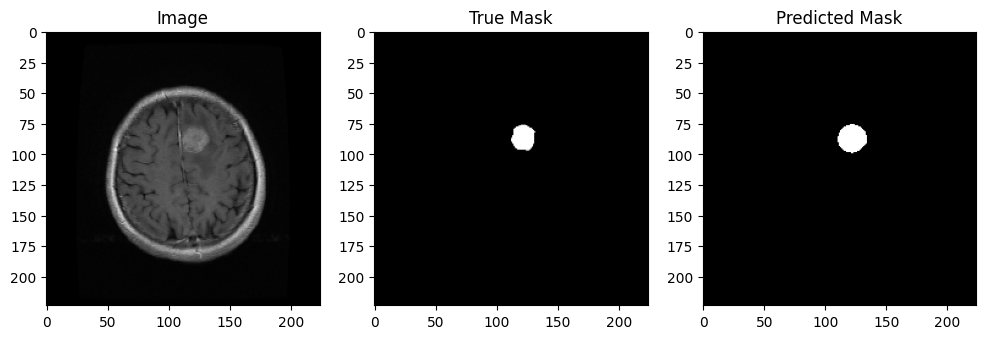

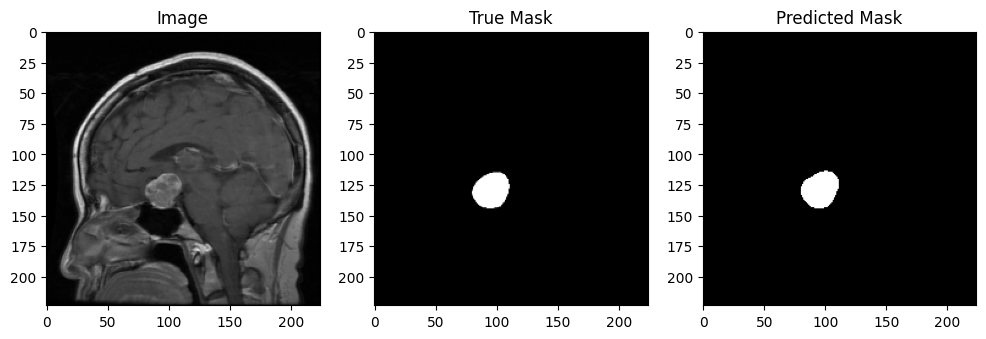

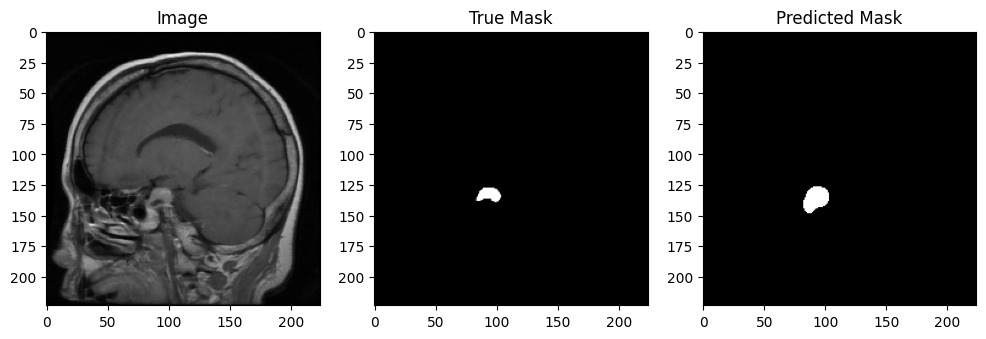

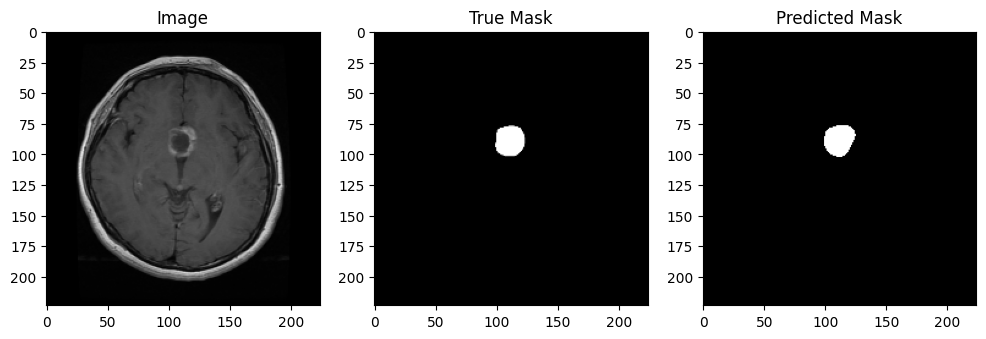

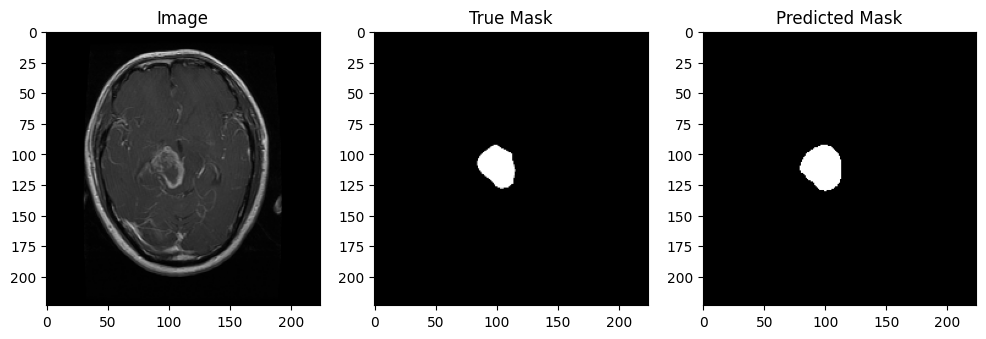

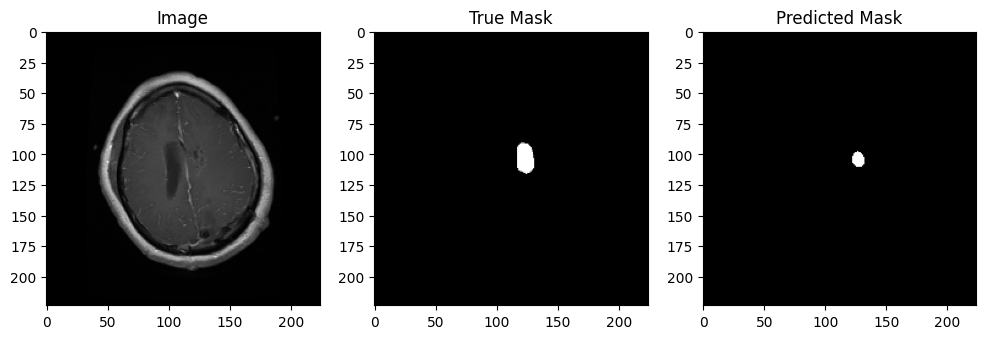

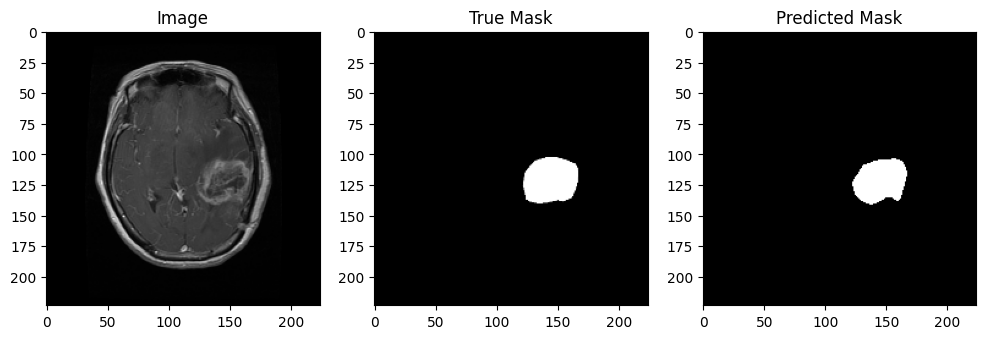

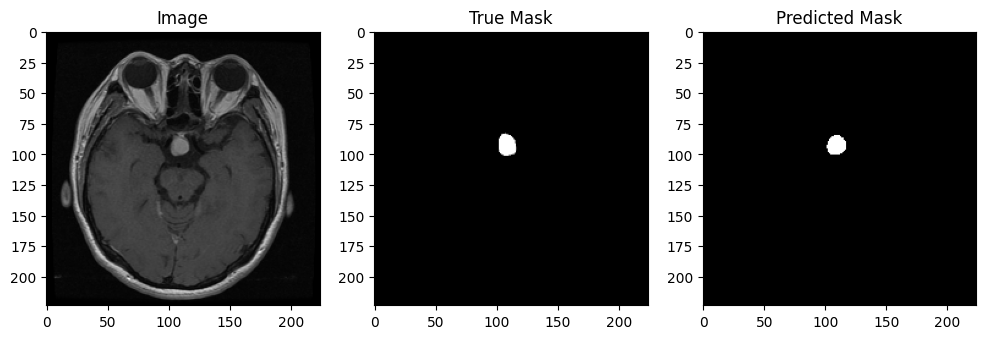

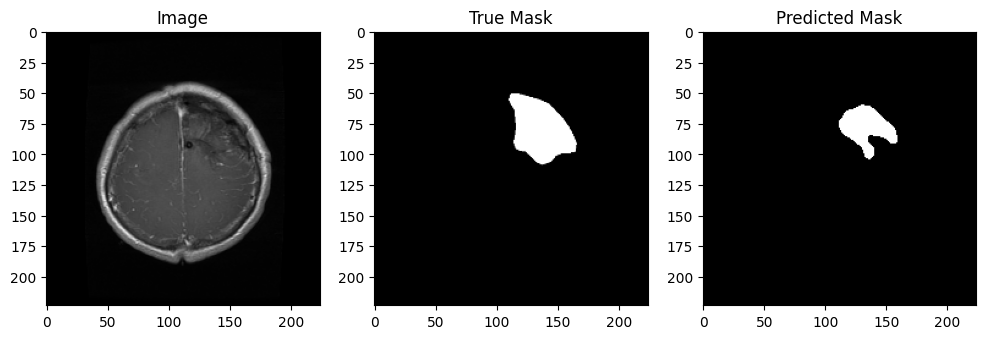

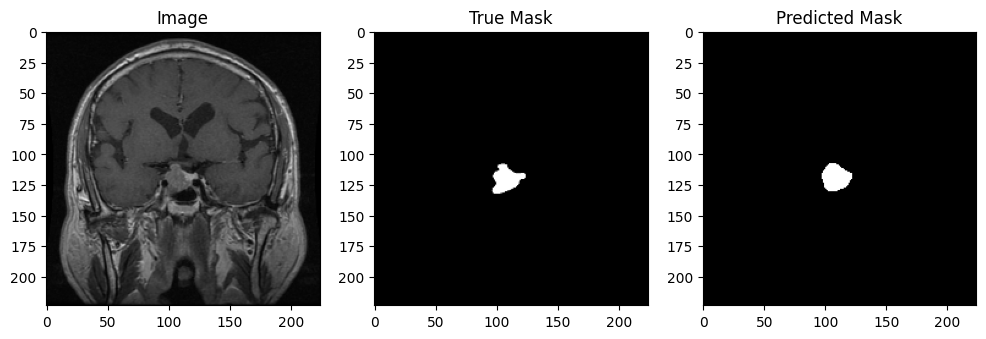

In [45]:
for i in range(10):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(X_test[i],cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i].squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(y_pred[i].squeeze(), cmap='gray')

    plt.show()

In [46]:
def overlay_mask(image, mask, alpha=0.4):
    # 1. Ensure the image is RGB even if it's grayscale
    if len(image.shape) == 2 or image.shape[-1] == 1:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    else:
        image_rgb = image.copy()

    # 2. Create a red overlay
    overlay = image_rgb.copy()
    red_color = np.zeros_like(image_rgb)
    red_color[:, :] = [255, 0, 0]  # Set all mask pixels to Red

    # 3. Blend only where the mask exists
    mask_indices = mask > 0
    overlay[mask_indices] = (
        (1 - alpha) * image_rgb[mask_indices] +
        alpha * red_color[mask_indices]
    ).astype(np.uint8)

    return overlay

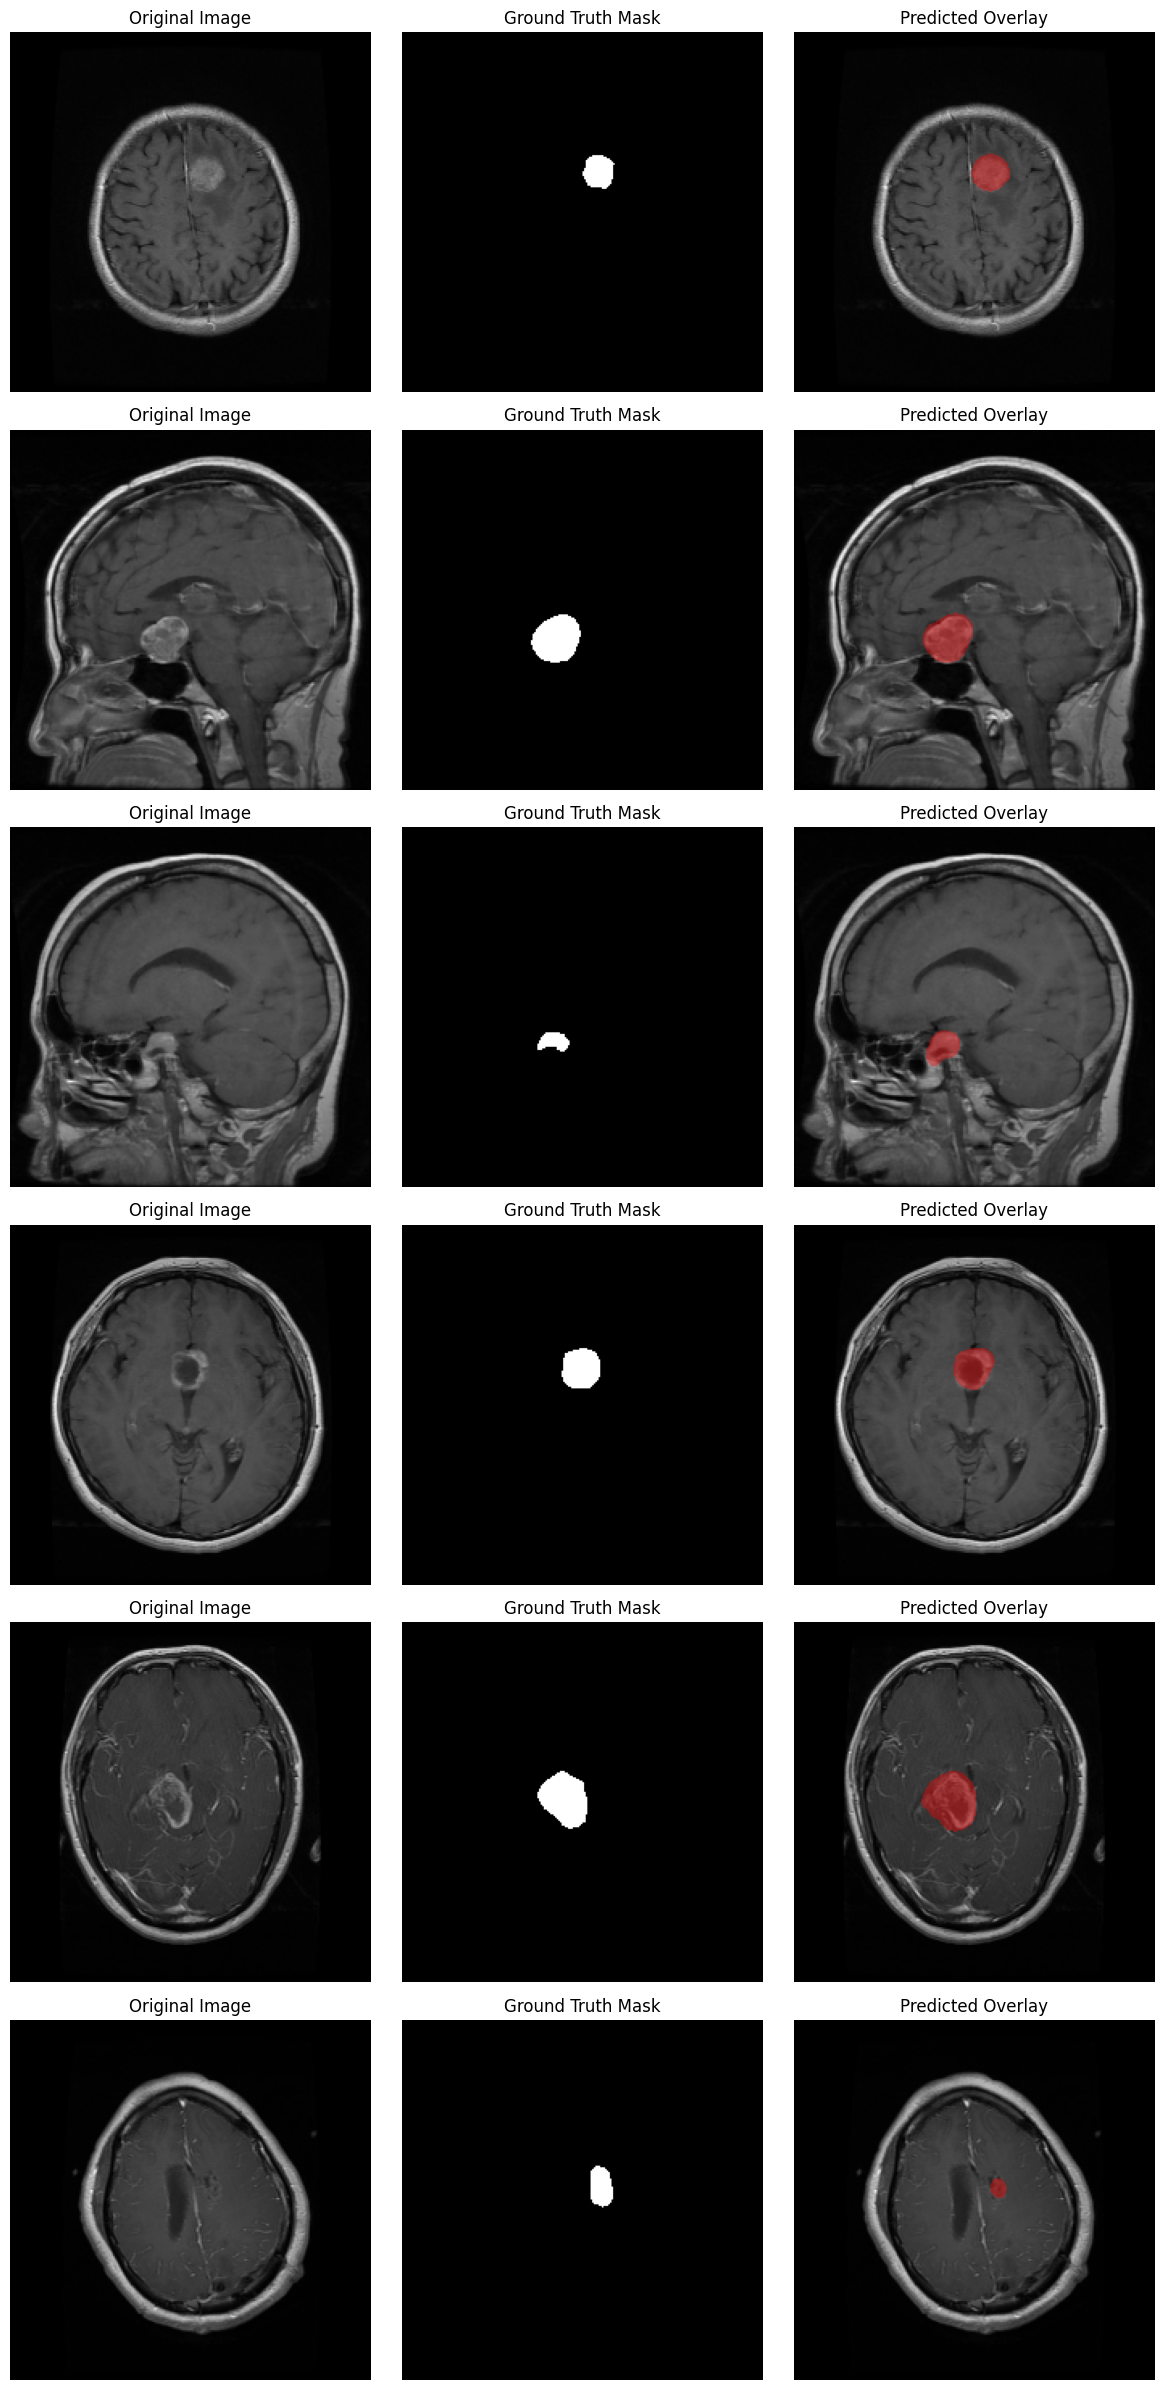

In [47]:

n_show = 6
fig, axs = plt.subplots(n_show, 3, figsize=(12, 4 * n_show))

for i in range(n_show):

    # Image (already loaded)
    img = X_test[i]

    # If normalized, bring back to uint8 for display
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    # Ground truth mask
    gt_mask = y_test[i]
    if gt_mask.ndim == 3:
        gt_mask = gt_mask.squeeze()
    gt_mask = (gt_mask > 0.5).astype(np.uint8)

    # Prepare input for model
    input_img = img.astype(np.float32) / 255.0
    input_img = np.expand_dims(input_img, axis=0)

    # Predict mask
    pred_prob = model.predict(input_img, verbose=0)[0, :, :, 0]
    pred_mask = (pred_prob > 0.5).astype(np.uint8)

    # Overlay prediction
    overlay_img = overlay_mask(img, pred_mask)

    # Plot

    axs[i, 0].imshow(img, cmap="gray")
    axs[i, 0].set_title("Original Image")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(gt_mask, cmap="gray")
    axs[i, 1].set_title("Ground Truth Mask")
    axs[i, 1].axis("off")

    axs[i, 2].imshow(overlay_img)

    axs[i, 2].set_title("Predicted Overlay")
    axs[i, 2].axis("off")



plt.tight_layout()
plt.show()